In [1]:
import pandas as pd
import numpy as np
from clases.Trainer import Trainer
from clases.NeuronalNetwork import NeuronalNetwork
from clases.ActivationFunction import *
from clases.Optimizer import *
from clases.LossFunction import *
from clases.Test import *

import warnings
warnings.filterwarnings("ignore")

## MNIST Data

### Load Data

In [2]:
# URL: https://www.kaggle.com/datasets/animatronbot/mnist-digit-recognizer
data = pd.read_csv('../datos/mnist_data.csv')
data = np.array(data)

### Split Data

In [3]:
m, n = data.shape
np.random.shuffle(data)

test_size = int(0.1 * m)
data_test = data[:test_size, :].T  # El 10% inicial para el conjunto de prueba

# El conjunto provisional restante (90%)
remaining_data = data[test_size:, :]

train_size = int(0.8 * m)
data_train = remaining_data[:train_size, :].T  # El siguiente 80% para entrenamiento
data_validation = remaining_data[train_size:, :].T  # El resto 10% para validación

X_train, Y_train = data_train[1:].T, data_train[0]
X_val, Y_val = data_validation[1:].T, data_validation[0]
X_test, Y_test = data_test[1:].T, data_test[0]

Y_train = np.eye(10)[Y_train]
Y_val = np.eye(10)[Y_val]
Y_test = np.eye(10)[Y_test]

# Normalización
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

### Train Data

#### Setup NN

In [11]:
layers_config = [
    {'output_size': 784, 'activation': ReLU},
    {'output_size': 10, 'activation': Softmax}
]

nn = NeuronalNetwork(784, layers_config)

#### SGD Optimizer

with learning rate 0.1

In [12]:
optimizer = SGDOptimizer(learning_rate=0.1)
trainer = Trainer(nn, optimizer, cross_entropy_loss, cross_entropy_loss_grad)
loss, acc, val_info = trainer.train(X_train, Y_train,X_val,Y_val, epochs=100, print_every=10)

--------------------------------------------------------------------
| Epoch   1 | time:  6.40s | val loss 0.312 | valid accuracy 0.204 |
--------------------------------------------------------------------
| Epoch  10 | time:  6.80s | val loss 0.183 | valid accuracy 0.758 |
--------------------------------------------------------------------
| Epoch  20 | time:  6.05s | val loss 0.125 | valid accuracy 0.829 |
--------------------------------------------------------------------
| Epoch  30 | time:  6.36s | val loss 0.101 | valid accuracy 0.858 |
--------------------------------------------------------------------
| Epoch  40 | time:  6.40s | val loss 0.087 | valid accuracy 0.872 |
--------------------------------------------------------------------
| Epoch  50 | time:  6.62s | val loss 0.079 | valid accuracy 0.880 |
--------------------------------------------------------------------
| Epoch  60 | time: 17.30s | val loss 0.073 | valid accuracy 0.887 |
----------------------------------

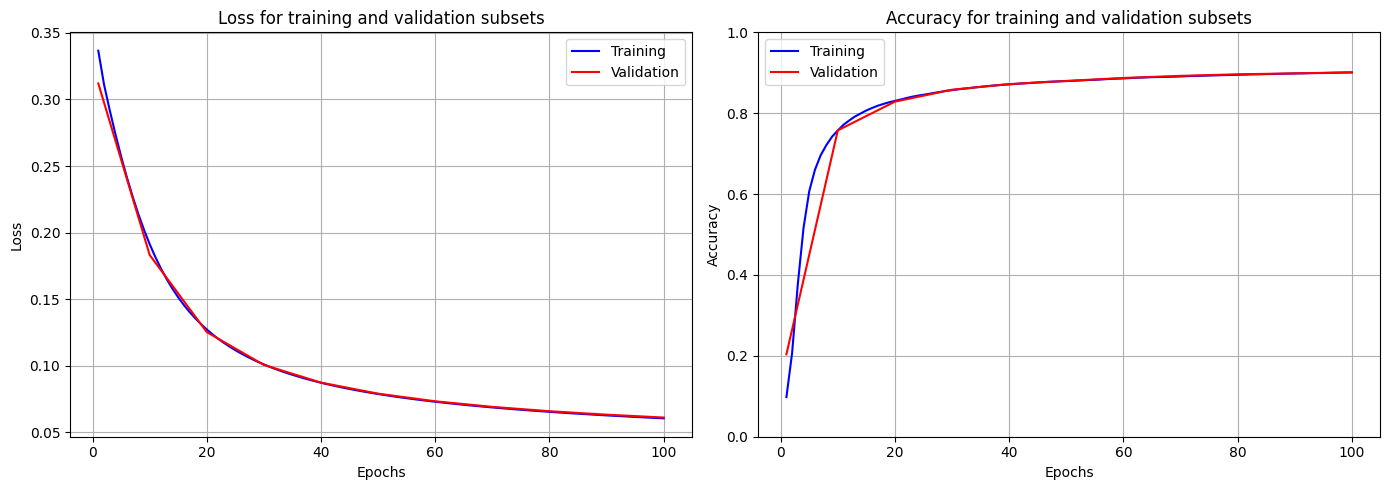

In [13]:
train_info = {'loss': loss, 'acc': acc}
plot_training_history_with_validation(train_info, val_info)

In [14]:
nn = NeuronalNetwork(784, layers_config)
optimizer = SGDOptimizer(learning_rate=1.)
trainer = Trainer(nn, optimizer, cross_entropy_loss, cross_entropy_loss_grad)
loss, acc, val_info = trainer.train(X_train, Y_train,X_val,Y_val, epochs=100, print_every=10)

--------------------------------------------------------------------
| Epoch   1 | time:  8.15s | val loss 0.346 | valid accuracy 0.265 |
--------------------------------------------------------------------
| Epoch  10 | time:  6.91s | val loss 0.282 | valid accuracy 0.407 |
--------------------------------------------------------------------
| Epoch  20 | time:  6.61s | val loss 0.170 | valid accuracy 0.620 |
--------------------------------------------------------------------
| Epoch  30 | time:  6.95s | val loss 0.085 | valid accuracy 0.862 |
--------------------------------------------------------------------
| Epoch  40 | time:  5.94s | val loss 0.057 | valid accuracy 0.906 |
--------------------------------------------------------------------
| Epoch  50 | time:  6.08s | val loss 0.050 | valid accuracy 0.919 |
--------------------------------------------------------------------
| Epoch  60 | time:  6.18s | val loss 0.042 | valid accuracy 0.932 |
----------------------------------

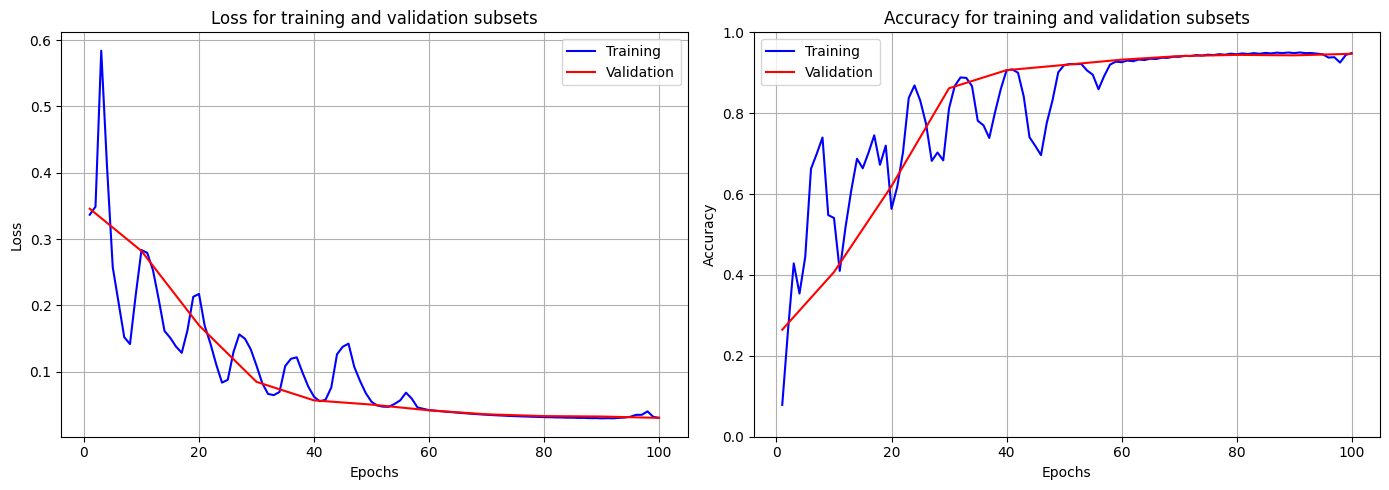

In [15]:
train_info = {'loss': loss, 'acc': acc}
plot_training_history_with_validation(train_info, val_info)

In [17]:
nn = NeuronalNetwork(784, layers_config)
optimizer = SGDOptimizer(learning_rate=0.5)
trainer = Trainer(nn, optimizer, cross_entropy_loss, cross_entropy_loss_grad)
loss, acc, val_info = trainer.train(X_train, Y_train,X_val,Y_val, epochs=100, print_every=10)

--------------------------------------------------------------------
| Epoch   1 | time:  7.31s | val loss 0.312 | valid accuracy 0.248 |
--------------------------------------------------------------------
| Epoch  10 | time:  6.64s | val loss 0.143 | valid accuracy 0.706 |
--------------------------------------------------------------------
| Epoch  20 | time:  7.25s | val loss 0.108 | valid accuracy 0.790 |
--------------------------------------------------------------------
| Epoch  30 | time:  7.72s | val loss 0.071 | valid accuracy 0.859 |
--------------------------------------------------------------------
| Epoch  40 | time:  7.43s | val loss 0.052 | valid accuracy 0.917 |
--------------------------------------------------------------------
| Epoch  50 | time:  8.35s | val loss 0.046 | valid accuracy 0.929 |
--------------------------------------------------------------------
| Epoch  60 | time:  7.23s | val loss 0.047 | valid accuracy 0.920 |
----------------------------------

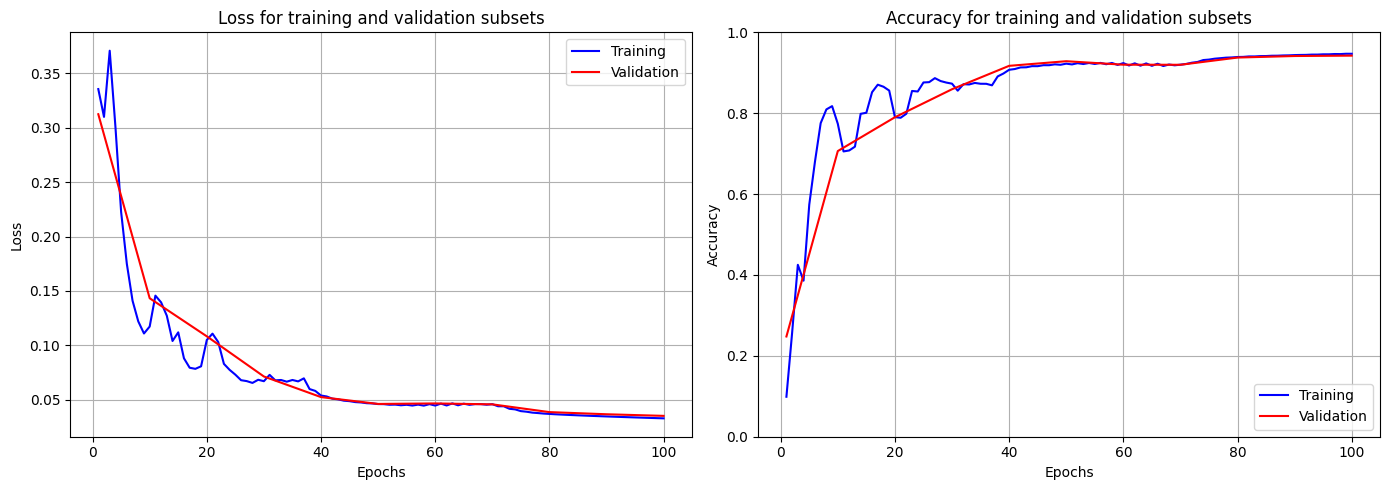

In [18]:
train_info = {'loss': loss, 'acc': acc}
plot_training_history_with_validation(train_info, val_info)

Elegir el mejor valor de paso de aprendizaje

In [19]:
nn = NeuronalNetwork(784, layers_config)
optimizer = SGDOptimizer(learning_rate=1.)
trainer = Trainer(nn, optimizer, cross_entropy_loss, cross_entropy_loss_grad)
loss, acc, val_info = trainer.train(X_train, Y_train,X_val,Y_val, epochs=200, print_every=10)

--------------------------------------------------------------------
| Epoch   1 | time:  6.82s | val loss 0.252 | valid accuracy 0.542 |
--------------------------------------------------------------------
| Epoch  10 | time:  7.59s | val loss 0.181 | valid accuracy 0.662 |
--------------------------------------------------------------------
| Epoch  20 | time:  6.55s | val loss 0.115 | valid accuracy 0.769 |
--------------------------------------------------------------------
| Epoch  30 | time:  7.02s | val loss 0.065 | valid accuracy 0.887 |
--------------------------------------------------------------------
| Epoch  40 | time:  7.00s | val loss 0.075 | valid accuracy 0.838 |
--------------------------------------------------------------------
| Epoch  50 | time:  7.04s | val loss 0.061 | valid accuracy 0.879 |
--------------------------------------------------------------------
| Epoch  60 | time:  8.25s | val loss 0.036 | valid accuracy 0.940 |
----------------------------------

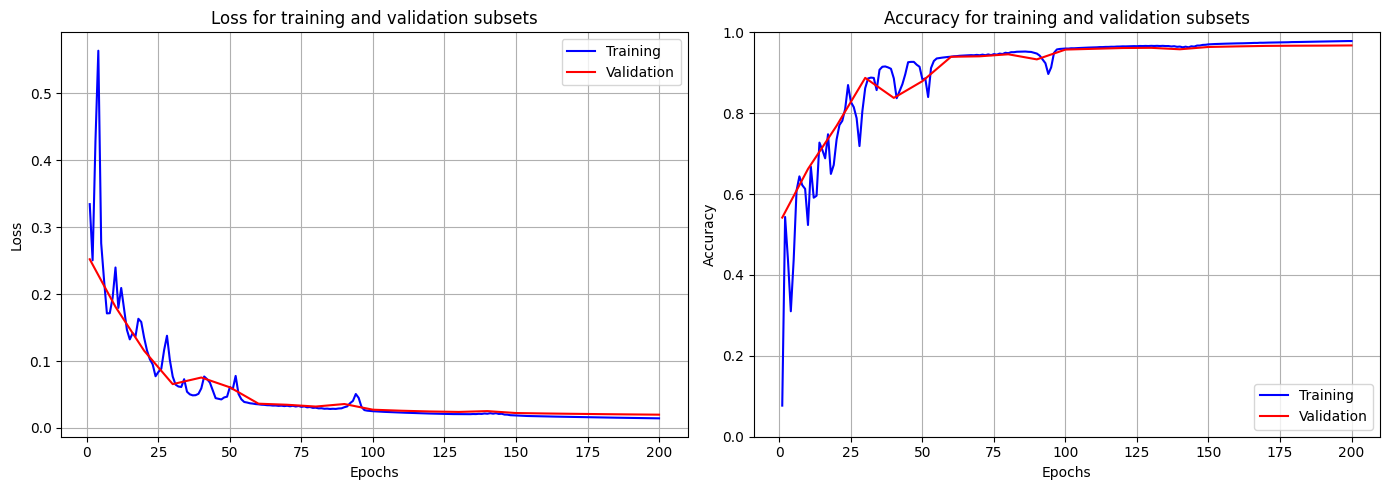

In [20]:
train_info = {'loss': loss, 'acc': acc}
plot_training_history_with_validation(train_info, val_info)

In [21]:
# Haz pruebas para el conjunto de prueba
Y_pred = predict(nn, X_test)
accuracy, metrics = calculate_metrics(Y_pred, Y_test)
print_metrics(accuracy, metrics)

Accuracy: 0.9676190476190476
              precision    recall  f1_score  support
class                                               
0              0.959821  0.988506  0.973952      435
1              0.984816  0.989107  0.986957      459
2              0.957500  0.967172  0.962312      396
3              0.969267  0.942529  0.955711      435
4              0.962085  0.968974  0.965517      419
5              0.955614  0.968254  0.961892      378
6              0.988010  0.983294  0.985646      419
7              0.973970  0.967672  0.970811      464
8              0.964912  0.960100  0.962500      401
9              0.955959  0.936548  0.946154      394
weighted_avg   0.967658  0.967619  0.967578     4200


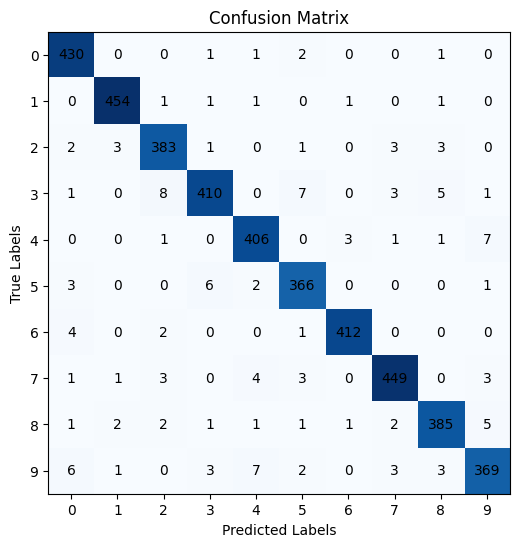

In [22]:
confusion_matrix(Y_test, Y_pred, class_labels=range(10))

#### Setup NN

In [26]:
layers_config = [
    {'output_size': 784, 'activation': ReLU},
    {'output_size': 10, 'activation': Softmax}
]

nn = NeuronalNetwork(784, layers_config)

#### Adam Optimizer

with learning rate 0.001

In [27]:
optimizer = AdamOptimizer(learning_rate=0.001)
trainer = Trainer(nn, optimizer, cross_entropy_loss, cross_entropy_loss_grad)
loss, acc, val_info = trainer.train(X_train, Y_train,X_val,Y_val, epochs=100, print_every=10)

--------------------------------------------------------------------
| Epoch   1 | time:  3.86s | val loss 0.281 | valid accuracy 0.502 |
--------------------------------------------------------------------
| Epoch  10 | time:  4.06s | val loss 0.090 | valid accuracy 0.858 |
--------------------------------------------------------------------
| Epoch  20 | time:  4.20s | val loss 0.057 | valid accuracy 0.903 |
--------------------------------------------------------------------
| Epoch  30 | time:  4.19s | val loss 0.046 | valid accuracy 0.921 |
--------------------------------------------------------------------
| Epoch  40 | time:  4.57s | val loss 0.040 | valid accuracy 0.936 |
--------------------------------------------------------------------
| Epoch  50 | time:  4.57s | val loss 0.036 | valid accuracy 0.941 |
--------------------------------------------------------------------
| Epoch  60 | time:  3.66s | val loss 0.032 | valid accuracy 0.948 |
----------------------------------

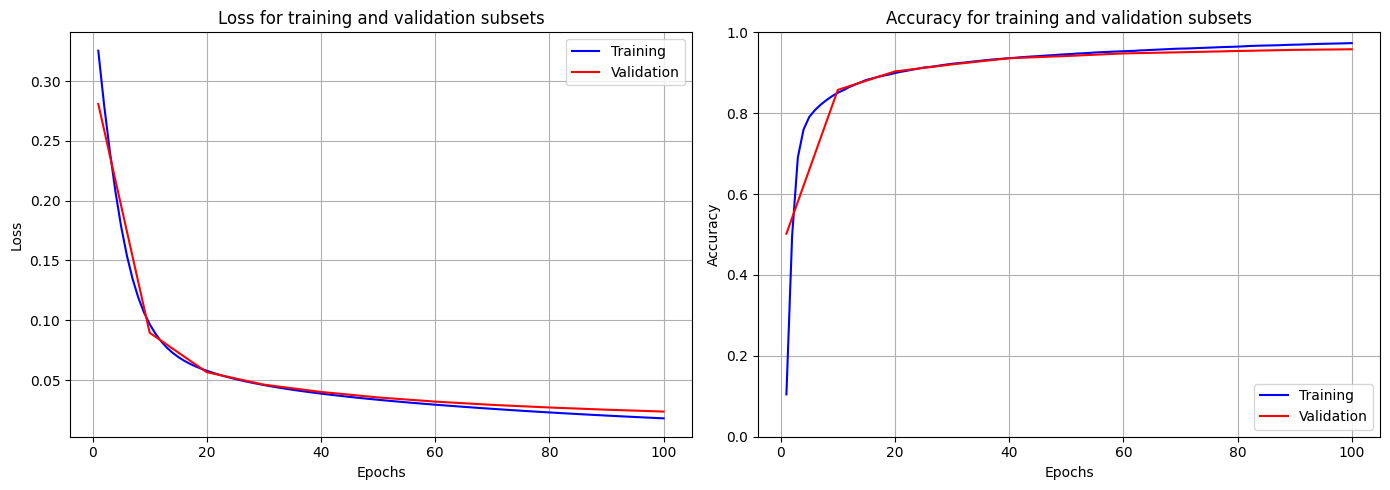

In [28]:
train_info = {'loss': loss, 'acc': acc}
plot_training_history_with_validation(train_info, val_info)

In [31]:
# Haz pruebas para el conjunto de prueba
Y_pred = predict(nn, X_test)
accuracy, metrics = calculate_metrics(Y_pred, Y_test)
print_metrics(accuracy, metrics)

Accuracy: 0.96
              precision    recall  f1_score  support
class                                               
0              0.955457  0.986207  0.970588      435
1              0.980603  0.991285  0.985915      459
2              0.947368  0.954545  0.950943      396
3              0.966825  0.937931  0.952159      435
4              0.959427  0.959427  0.959427      419
5              0.952381  0.952381  0.952381      378
6              0.980769  0.973747  0.977246      419
7              0.969365  0.954741  0.961998      464
8              0.945545  0.952618  0.949068      401
9              0.936224  0.931472  0.933842      394
weighted_avg   0.960050  0.960000  0.959964     4200


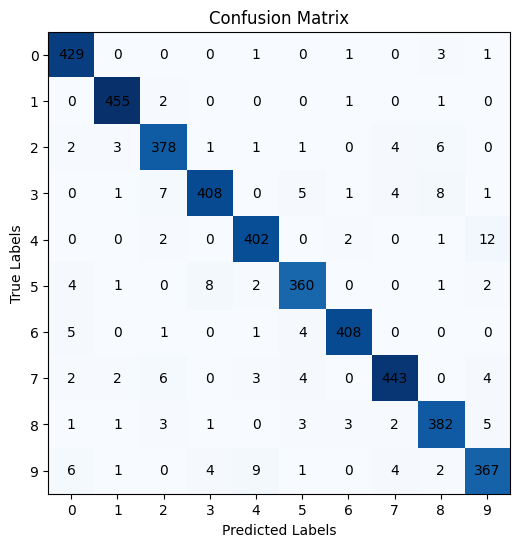

In [32]:
confusion_matrix(Y_test, Y_pred, class_labels=range(10))

with learning rate 0.01

In [33]:
nn = NeuronalNetwork(784, layers_config)
optimizer = AdamOptimizer(learning_rate=0.01)
trainer = Trainer(nn, optimizer, cross_entropy_loss, cross_entropy_loss_grad)
loss, acc, val_info = trainer.train(X_train, Y_train,X_val,Y_val, epochs=100, print_every=10)

--------------------------------------------------------------------
| Epoch   1 | time:  3.97s | val loss 0.348 | valid accuracy 0.474 |
--------------------------------------------------------------------
| Epoch  10 | time:  3.71s | val loss 0.113 | valid accuracy 0.813 |
--------------------------------------------------------------------
| Epoch  20 | time:  4.58s | val loss 0.052 | valid accuracy 0.907 |
--------------------------------------------------------------------
| Epoch  30 | time:  4.38s | val loss 0.036 | valid accuracy 0.938 |
--------------------------------------------------------------------
| Epoch  40 | time:  4.38s | val loss 0.027 | valid accuracy 0.953 |
--------------------------------------------------------------------
| Epoch  50 | time:  4.30s | val loss 0.023 | valid accuracy 0.960 |
--------------------------------------------------------------------
| Epoch  60 | time:  4.23s | val loss 0.020 | valid accuracy 0.966 |
----------------------------------

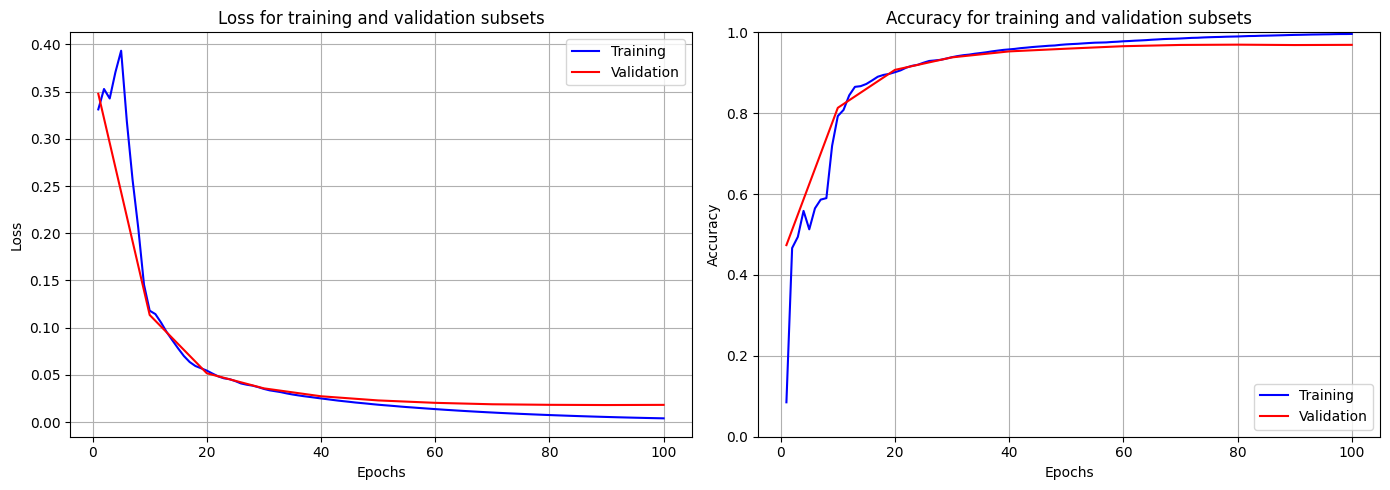

In [34]:
train_info = {'loss': loss, 'acc': acc}
plot_training_history_with_validation(train_info, val_info)

In [35]:
# Haz pruebas para el conjunto de prueba
Y_pred = predict(nn, X_test)
accuracy = evaluate(Y_pred, Y_test)

print(f"Accuracy: {accuracy}")

Accuracy: 0.9707142857142858


with learning rate 0.005

In [37]:
nn = NeuronalNetwork(784, layers_config)
optimizer = AdamOptimizer(learning_rate=0.005)
trainer = Trainer(nn, optimizer, cross_entropy_loss, cross_entropy_loss_grad)
loss, acc, val_info = trainer.train(X_train, Y_train,X_val,Y_val, epochs=100, print_every=10)

--------------------------------------------------------------------
| Epoch   1 | time:  4.17s | val loss 0.249 | valid accuracy 0.497 |
--------------------------------------------------------------------
| Epoch  10 | time:  3.71s | val loss 0.074 | valid accuracy 0.868 |
--------------------------------------------------------------------
| Epoch  20 | time:  3.78s | val loss 0.043 | valid accuracy 0.922 |
--------------------------------------------------------------------
| Epoch  30 | time:  3.90s | val loss 0.033 | valid accuracy 0.945 |
--------------------------------------------------------------------
| Epoch  40 | time:  3.78s | val loss 0.027 | valid accuracy 0.956 |
--------------------------------------------------------------------
| Epoch  50 | time:  3.88s | val loss 0.023 | valid accuracy 0.960 |
--------------------------------------------------------------------
| Epoch  60 | time:  4.56s | val loss 0.021 | valid accuracy 0.964 |
----------------------------------

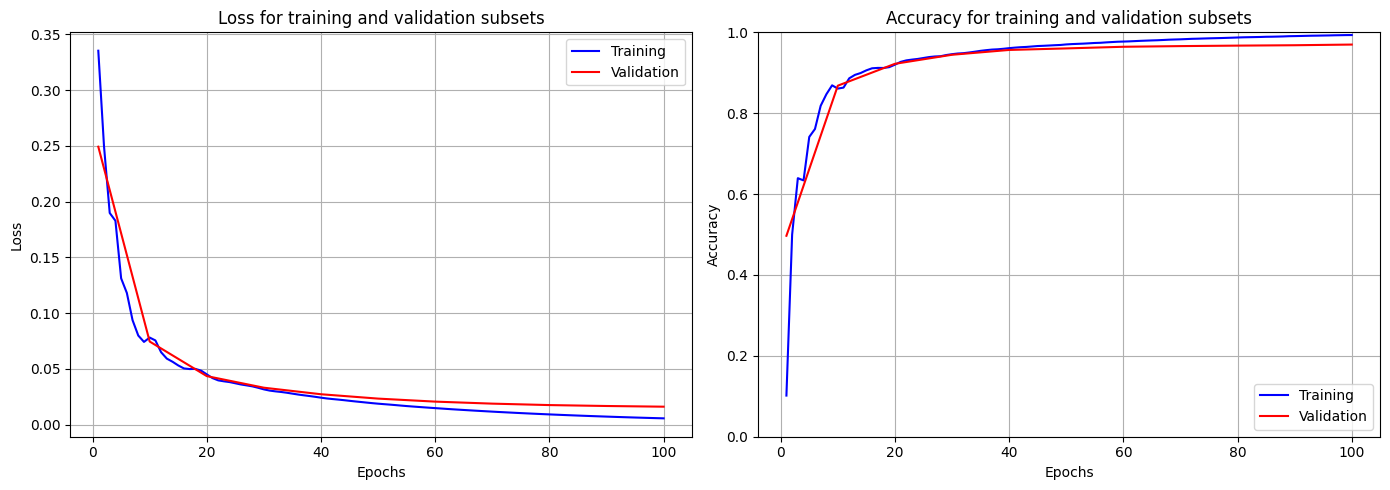

In [38]:
train_info = {'loss': loss, 'acc': acc}
plot_training_history_with_validation(train_info, val_info)

In [39]:
# Haz pruebas para el conjunto de prueba
Y_pred = predict(nn, X_test)
accuracy = evaluate(Y_pred, Y_test)

print(f"Accuracy: {accuracy}")

Accuracy: 0.9738095238095238


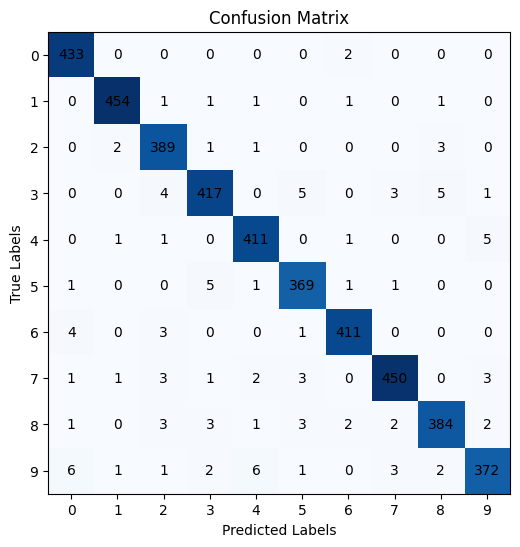

In [40]:
confusion_matrix(Y_test, Y_pred, class_labels=range(10))

with learning rate 0.05

In [42]:
nn = NeuronalNetwork(784, layers_config)
optimizer = AdamOptimizer(learning_rate=0.05)
trainer = Trainer(nn, optimizer, cross_entropy_loss, cross_entropy_loss_grad)
loss, acc, val_info = trainer.train(X_train, Y_train,X_val,Y_val, epochs=100, print_every=10)

--------------------------------------------------------------------
| Epoch   1 | time:  3.95s | val loss 2.455 | valid accuracy 0.138 |
--------------------------------------------------------------------
| Epoch  10 | time:  4.39s | val loss 3.316 | valid accuracy 0.209 |
--------------------------------------------------------------------
| Epoch  20 | time:  4.53s | val loss 3.306 | valid accuracy 0.207 |
--------------------------------------------------------------------
| Epoch  30 | time:  4.42s | val loss 3.419 | valid accuracy 0.209 |
--------------------------------------------------------------------
| Epoch  40 | time:  4.45s | val loss 4.067 | valid accuracy 0.116 |
--------------------------------------------------------------------
| Epoch  50 | time:  4.34s | val loss 4.049 | valid accuracy 0.116 |
--------------------------------------------------------------------
| Epoch  60 | time:  4.32s | val loss 3.580 | valid accuracy 0.204 |
----------------------------------

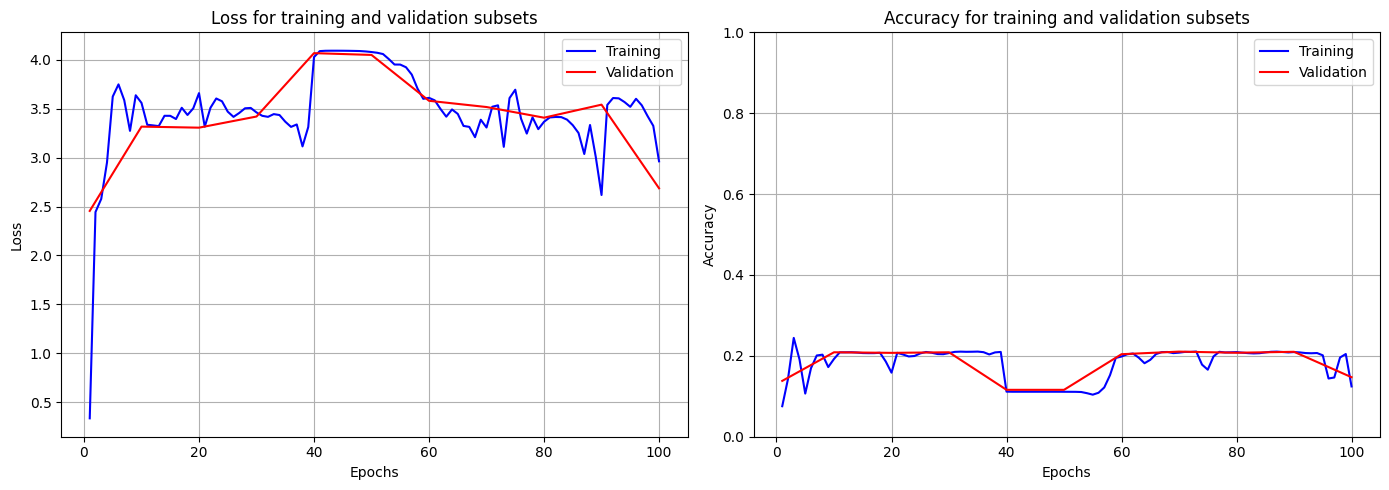

In [43]:
train_info = {'loss': loss, 'acc': acc}
plot_training_history_with_validation(train_info, val_info)

con el rato de aprendizaje 0.0005

In [46]:
nn = NeuronalNetwork(784, layers_config)
optimizer = AdamOptimizer(learning_rate=0.0005)
trainer = Trainer(nn, optimizer, cross_entropy_loss, cross_entropy_loss_grad)
loss, acc, val_info = trainer.train(X_train, Y_train,X_val,Y_val, epochs=100, print_every=10)

--------------------------------------------------------------------
| Epoch   1 | time:  3.98s | val loss 0.313 | valid accuracy 0.219 |
--------------------------------------------------------------------
| Epoch  10 | time:  4.31s | val loss 0.165 | valid accuracy 0.786 |
--------------------------------------------------------------------
| Epoch  20 | time:  4.34s | val loss 0.092 | valid accuracy 0.858 |
--------------------------------------------------------------------
| Epoch  30 | time:  4.43s | val loss 0.067 | valid accuracy 0.894 |
--------------------------------------------------------------------
| Epoch  40 | time:  4.35s | val loss 0.056 | valid accuracy 0.910 |
--------------------------------------------------------------------
| Epoch  50 | time:  4.23s | val loss 0.049 | valid accuracy 0.920 |
--------------------------------------------------------------------
| Epoch  60 | time:  4.47s | val loss 0.045 | valid accuracy 0.929 |
----------------------------------

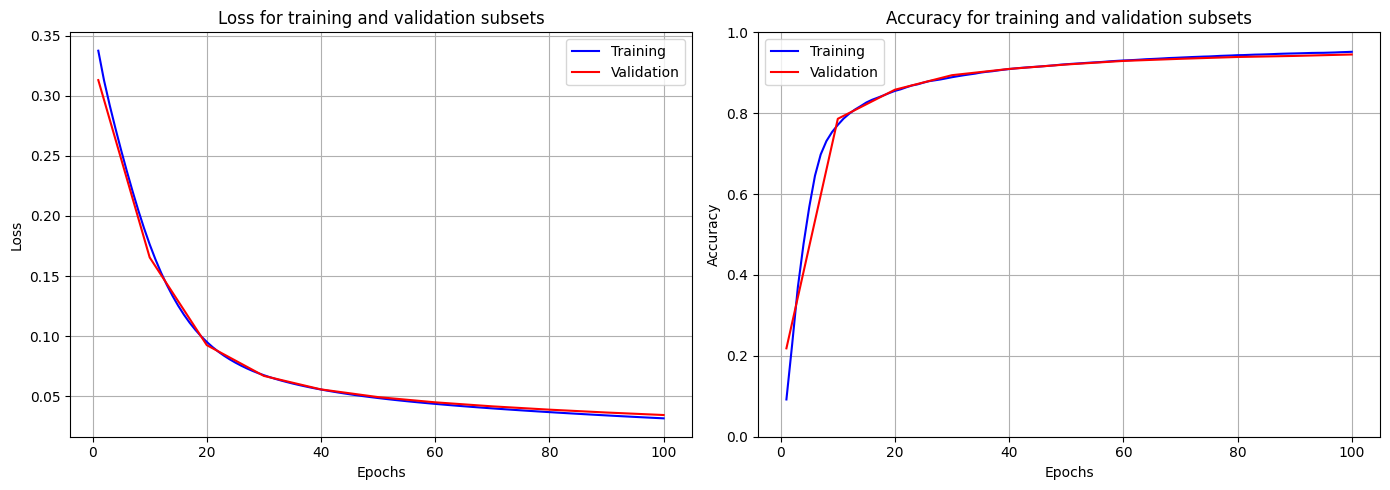

In [49]:
train_info = {'loss': loss, 'acc': acc}
plot_training_history_with_validation(train_info, val_info)

In [47]:
# Haz pruebas para el conjunto de prueba
Y_pred = predict(nn, X_test)
accuracy = evaluate(Y_pred, Y_test)

print(f"Accuracy: {accuracy}")

Accuracy: 0.9416666666666667


la mejor para siguientes experimentos va a ser 0.001

In [51]:
nn = NeuronalNetwork(784, layers_config)
optimizer = AdamOptimizer(learning_rate=0.001)
trainer = Trainer(nn, optimizer, cross_entropy_loss, cross_entropy_loss_grad)
loss, acc, val_info = trainer.train(X_train, Y_train,X_val,Y_val, epochs=260, print_every=10)

--------------------------------------------------------------------
| Epoch   1 | time:  4.04s | val loss 0.291 | valid accuracy 0.410 |
--------------------------------------------------------------------
| Epoch  10 | time:  3.88s | val loss 0.096 | valid accuracy 0.846 |
--------------------------------------------------------------------
| Epoch  20 | time:  4.02s | val loss 0.059 | valid accuracy 0.901 |
--------------------------------------------------------------------
| Epoch  30 | time:  4.27s | val loss 0.048 | valid accuracy 0.919 |
--------------------------------------------------------------------
| Epoch  40 | time:  4.41s | val loss 0.042 | valid accuracy 0.931 |
--------------------------------------------------------------------
| Epoch  50 | time:  4.49s | val loss 0.037 | valid accuracy 0.940 |
--------------------------------------------------------------------
| Epoch  60 | time:  4.15s | val loss 0.033 | valid accuracy 0.946 |
----------------------------------

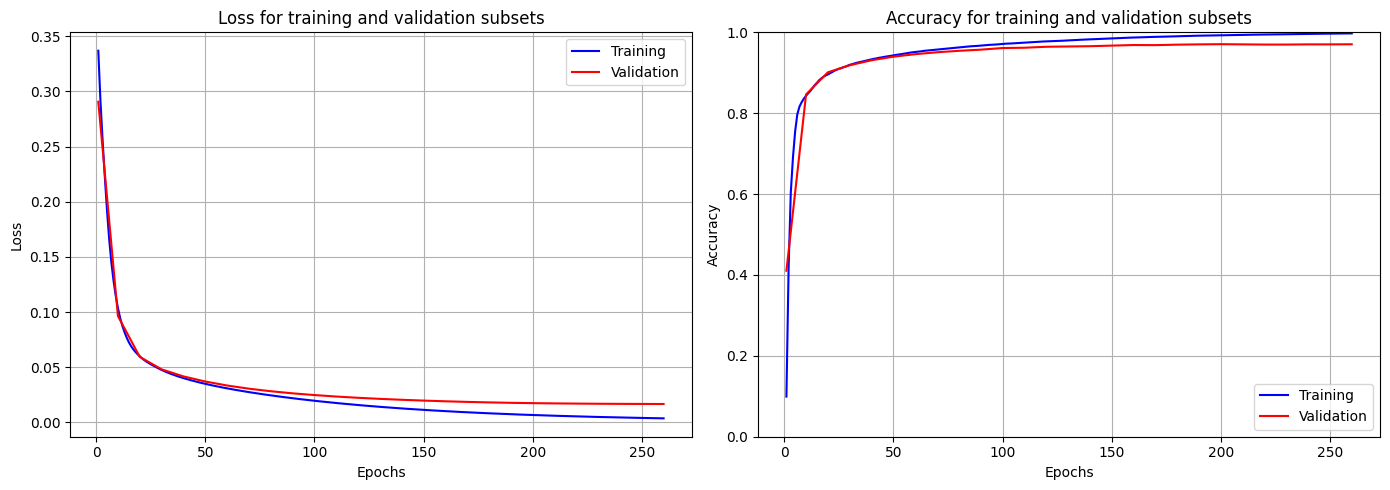

In [52]:
train_info = {'loss': loss, 'acc': acc}
plot_training_history_with_validation(train_info, val_info)

In [53]:
Y_pred = predict(nn, X_test)
accuracy, metrics = calculate_metrics(Y_pred, Y_test)
print_metrics(accuracy, metrics)

Accuracy: 0.9735714285714285
              precision    recall  f1_score  support
class                                               
0              0.972973  0.993103  0.982935      435
1              0.986957  0.989107  0.988030      459
2              0.960396  0.979798  0.970000      396
3              0.965197  0.956322  0.960739      435
4              0.969412  0.983294  0.976303      419
5              0.976000  0.968254  0.972112      378
6              0.985680  0.985680  0.985680      419
7              0.980392  0.969828  0.975081      464
8              0.960199  0.962594  0.961395      401
9              0.976378  0.944162  0.960000      394
weighted_avg   0.973614  0.973571  0.973536     4200


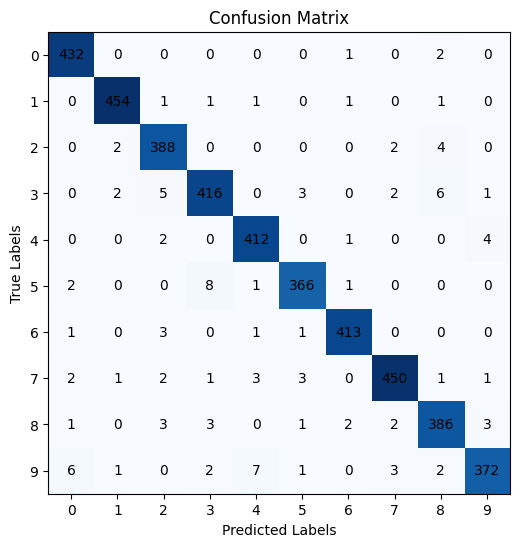

In [54]:
confusion_matrix(Y_test, Y_pred, class_labels=range(10))

## Fashion MNIST Data

### Load Data

In [2]:
# URL: https://www.kaggle.com/datasets/zalando-research/fashionmnist/data
data1 = pd.read_csv('../datos/fashion-mnist_train.csv')
data2 = pd.read_csv('../datos/fashion-mnist_test.csv')
data = pd.concat([data1, data2])
data = np.array(data)

In [3]:
labels = ["Tshirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

### Split Data

In [4]:
m, n = data.shape
np.random.shuffle(data)

test_size = int(0.1 * m)
data_test = data[:test_size, :].T  # El 10% inicial para el conjunto de prueba

# El conjunto provisional restante (90%)
remaining_data = data[test_size:, :]

train_size = int(0.8 * m)
data_train = remaining_data[:train_size, :].T  # El siguiente 80% para entrenamiento
data_validation = remaining_data[train_size:, :].T  # El resto 10% para validación

X_train, Y_train = data_train[1:].T, data_train[0]
X_val, Y_val = data_validation[1:].T, data_validation[0]
X_test, Y_test = data_test[1:].T, data_test[0]

Y_train = np.eye(10)[Y_train]
Y_val = np.eye(10)[Y_val]
Y_test = np.eye(10)[Y_test]

# Normalización
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

### Train Data

#### Setup NN

In [15]:
layers_config = [
    {'output_size': 15, 'activation': ReLU},
    {'output_size': 10, 'activation': Softmax}
]

nn = NeuronalNetwork(784, layers_config)

#### SGD Optimizer

In [16]:
optimizer = SGDOptimizer(learning_rate=0.1)
trainer = Trainer(nn, optimizer, cross_entropy_loss, cross_entropy_loss_grad)
loss, acc, val_info = trainer.train(X_train, Y_train,X_val,Y_val, epochs=100, print_every=10)

--------------------------------------------------------------------
| Epoch   1 | time:  2.17s | val loss 0.322 | valid accuracy 0.230 |
--------------------------------------------------------------------
| Epoch  10 | time:  1.76s | val loss 0.262 | valid accuracy 0.453 |
--------------------------------------------------------------------
| Epoch  20 | time:  1.58s | val loss 0.200 | valid accuracy 0.589 |
--------------------------------------------------------------------
| Epoch  30 | time:  3.60s | val loss 0.170 | valid accuracy 0.638 |
--------------------------------------------------------------------
| Epoch  40 | time:  1.82s | val loss 0.150 | valid accuracy 0.682 |
--------------------------------------------------------------------
| Epoch  50 | time:  1.52s | val loss 0.140 | valid accuracy 0.704 |
--------------------------------------------------------------------
| Epoch  60 | time:  1.54s | val loss 0.133 | valid accuracy 0.717 |
----------------------------------

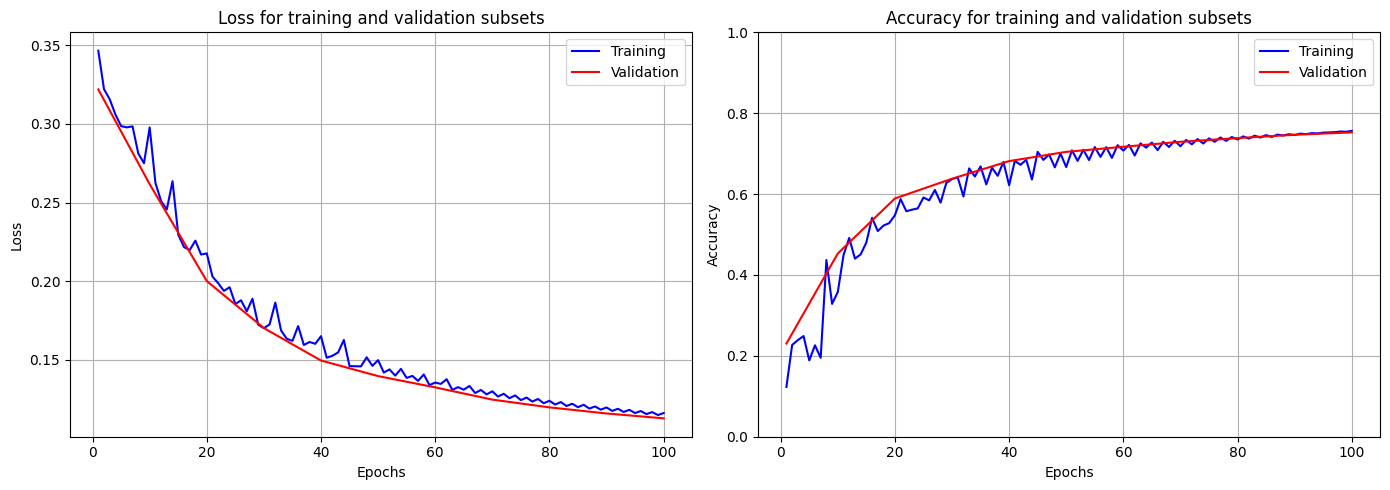

In [17]:
train_info = {'loss': loss, 'acc': acc}
plot_training_history_with_validation(train_info, val_info)

In [19]:
layers_config = [
    {'output_size': 28, 'activation': ReLU},
    {'output_size': 10, 'activation': Softmax}
]

nn = NeuronalNetwork(784, layers_config)

In [20]:
optimizer = SGDOptimizer(learning_rate=0.1)
trainer = Trainer(nn, optimizer, cross_entropy_loss, cross_entropy_loss_grad)
loss, acc, val_info = trainer.train(X_train, Y_train,X_val,Y_val, epochs=100, print_every=10)

--------------------------------------------------------------------
| Epoch   1 | time:  2.26s | val loss 0.309 | valid accuracy 0.274 |
--------------------------------------------------------------------
| Epoch  10 | time:  1.96s | val loss 0.218 | valid accuracy 0.612 |
--------------------------------------------------------------------
| Epoch  20 | time:  1.69s | val loss 0.181 | valid accuracy 0.621 |
--------------------------------------------------------------------
| Epoch  30 | time:  2.90s | val loss 0.150 | valid accuracy 0.661 |
--------------------------------------------------------------------
| Epoch  40 | time:  2.23s | val loss 0.141 | valid accuracy 0.699 |
--------------------------------------------------------------------
| Epoch  50 | time:  1.85s | val loss 0.133 | valid accuracy 0.711 |
--------------------------------------------------------------------
| Epoch  60 | time:  2.13s | val loss 0.136 | valid accuracy 0.702 |
----------------------------------

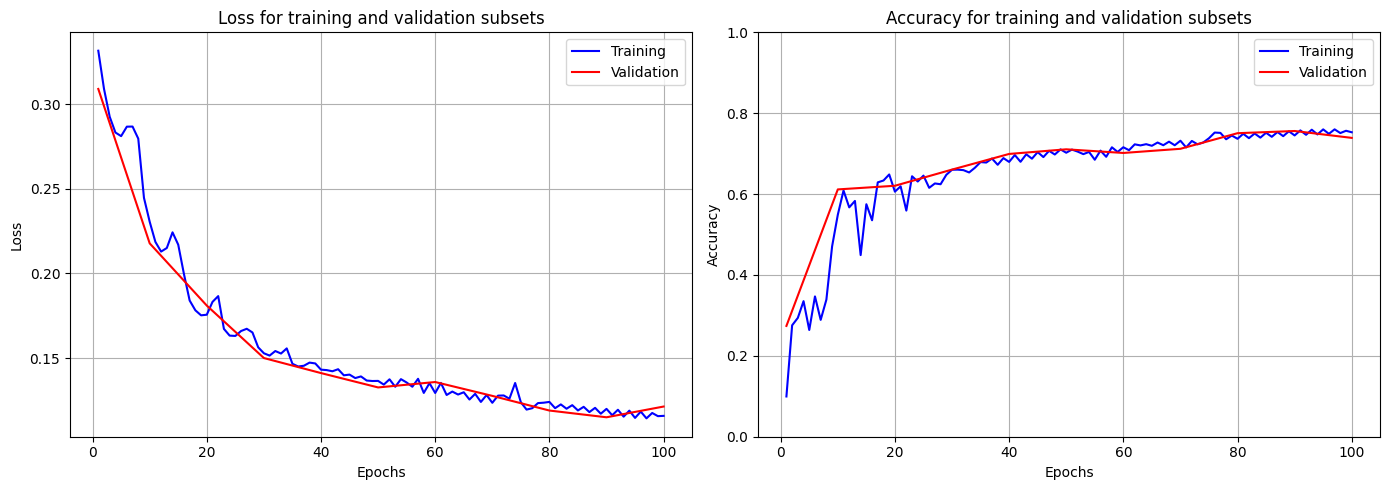

In [21]:
train_info = {'loss': loss, 'acc': acc}
plot_training_history_with_validation(train_info, val_info)

In [22]:
# Haz pruebas para el conjunto de prueba
Y_pred = predict(nn, X_test)
accuracy, metrics = calculate_metrics(Y_pred, Y_test, labels)
print_metrics(accuracy, metrics)

Accuracy: 0.7505714285714286
              precision    recall  f1_score  support
class                                               
Tshirt/top     0.780338  0.726753  0.752593      699
Trouser        0.955267  0.949785  0.952518      697
Pullover       0.864198  0.099291  0.178117      705
Dress          0.783679  0.871758  0.825375      694
Coat           0.526062  0.809807  0.637800      673
Sandal         0.956693  0.715758  0.818871      679
Shirt          0.426265  0.566524  0.486486      699
Sneaker        0.788902  0.900826  0.841158      726
Bag            0.931276  0.923505  0.927374      719
Ankle boot     0.842640  0.936530  0.887108      709
weighted_avg   0.786538  0.750571  0.731440     7000


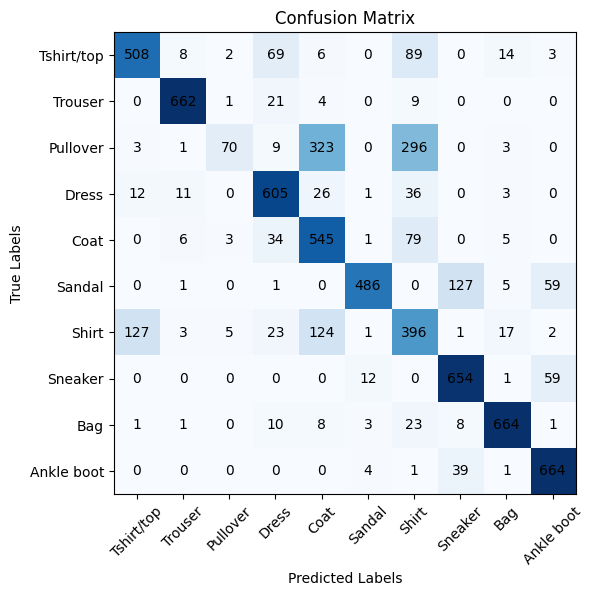

In [23]:
confusion_matrix(Y_test, Y_pred, class_labels=labels, inclain=True)

#### Setup NN

In [49]:
layers_config = [
    {'output_size': 784, 'activation': ReLU},
    {'output_size': 10, 'activation': Softmax}
]

nn = NeuronalNetwork(784, layers_config)

#### Adam Optimizer

In [51]:
optimizer = AdamOptimizer(learning_rate=0.001)
trainer = Trainer(nn, optimizer, cross_entropy_loss, cross_entropy_loss_grad)
loss, acc, val_info = trainer.train(X_train, Y_train,X_val,Y_val, epochs=100, print_every=10)

--------------------------------------------------------------------


KeyboardInterrupt: 

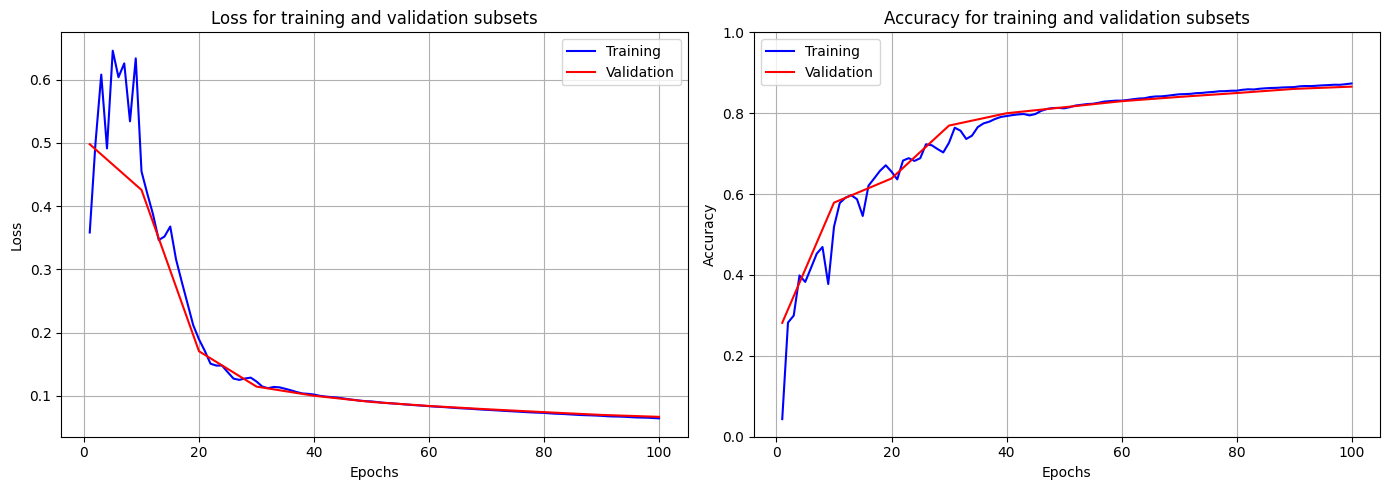

In [48]:
train_info = {'loss': loss, 'acc': acc}
plot_training_history_with_validation(train_info, val_info)

In [44]:
# Haz pruebas para el conjunto de prueba
Y_pred = predict(nn, X_test)
accuracy = evaluate(Y_pred, Y_test)

print(f"Accuracy: {accuracy}")

Accuracy: 0.8198571428571428


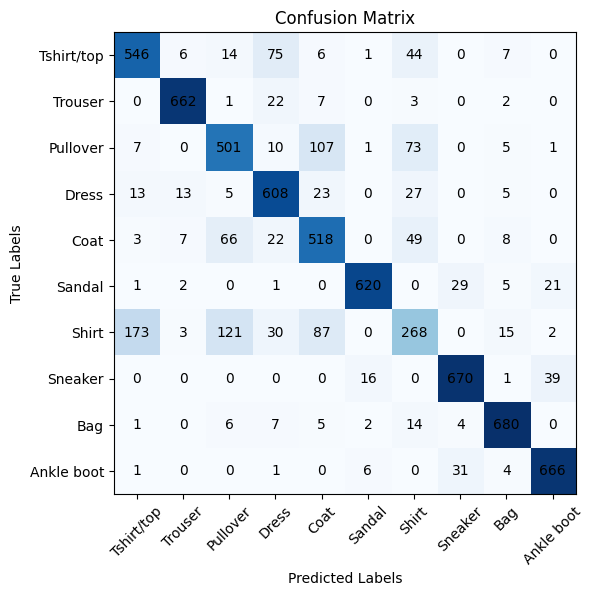

In [45]:
confusion_matrix(Y_test, Y_pred, class_labels=labels, inclain=True)